In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [ ]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# Display the first few rows of the dataset
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Label Encoding: Convert 'Gender' column to numeric
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

In [ ]:
# Feature Scaling
scaler = StandardScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

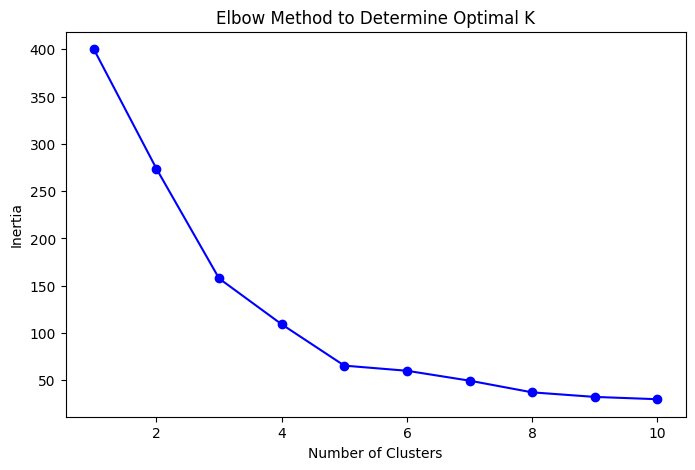

In [ ]:
# 1. Partitioning Clustering (K-Means)
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [ ]:
# Fit K-Means with optimal clusters (choose based on the Elbow plot)
optimal_clusters = 5  # Assuming we select 5 based on the elbow
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X)

In [ ]:
# 2. Density-Based Clustering (DBSCAN)
# Fit DBSCAN with chosen parameters for eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X)

In [ ]:
# 3. Distribution Model-Based Clustering (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X)

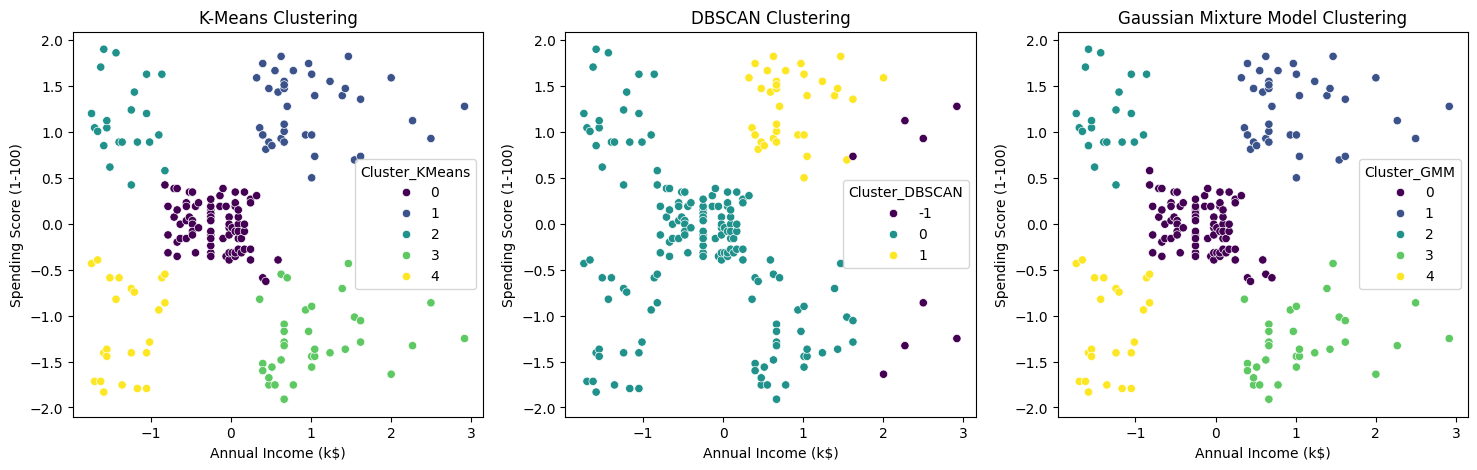

In [ ]:
# Visualize Clusters for each clustering method
plt.figure(figsize=(18, 5))

# K-Means Clustering Visualization
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', palette='viridis')
plt.title('K-Means Clustering')

# DBSCAN Clustering Visualization
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_DBSCAN', palette='viridis')
plt.title('DBSCAN Clustering')

# GMM Clustering Visualization
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_GMM', palette='viridis')
plt.title('Gaussian Mixture Model Clustering')

plt.show()

In [ ]:
# Evaluation Metrics for each model
# 1. K-Means Evaluation
kmeans_silhouette = silhouette_score(X, df['Cluster_KMeans'])
kmeans_davies_bouldin = davies_bouldin_score(X, df['Cluster_KMeans'])

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Davies-Bouldin Index:", kmeans_davies_bouldin)


K-Means Silhouette Score: 0.5546571631111091
K-Means Davies-Bouldin Index: 0.5722356162263352


In [ ]:
# 2. DBSCAN Evaluation (Note: silhouette score may be lower due to noise points (-1 label))
# Filter out noise points for DBSCAN score calculation
dbscan_labels = df['Cluster_DBSCAN']
dbscan_labels_filtered = dbscan_labels[dbscan_labels != -1]
X_dbscan_filtered = X[dbscan_labels != -1]

if len(set(dbscan_labels_filtered)) > 1:  # Only calculate if there are more than 1 cluster
    dbscan_silhouette = silhouette_score(X_dbscan_filtered, dbscan_labels_filtered)
    dbscan_davies_bouldin = davies_bouldin_score(X_dbscan_filtered, dbscan_labels_filtered)
    print("DBSCAN Silhouette Score (excluding noise):", dbscan_silhouette)
    print("DBSCAN Davies-Bouldin Index (excluding noise):", dbscan_davies_bouldin)
else:
    print("DBSCAN clustering did not find enough clusters.")

DBSCAN Silhouette Score (excluding noise): 0.3875583892728279
DBSCAN Davies-Bouldin Index (excluding noise): 0.7888642629621753


In [ ]:
# 3. GMM Evaluation
gmm_silhouette = silhouette_score(X, df['Cluster_GMM'])
gmm_davies_bouldin = davies_bouldin_score(X, df['Cluster_GMM'])

print("GMM Silhouette Score:", gmm_silhouette)
print("GMM Davies-Bouldin Index:", gmm_davies_bouldin)

GMM Silhouette Score: 0.5536892843811245
GMM Davies-Bouldin Index: 0.5760100302410824
